## Link to Dataset:
https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

In [ ]:
# First, some useful imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# Loading the dataset
student_df = pd.read_csv('/content/student_math_clean.csv')
# Let's get a look at the metadata
#student_df.info()
# Let's take a quick peek at the data
#student_df.head()

## 1. Explain the data (meaning of each variable, variable types), and explain your question (what you want to predict), and the meaning of your question


---


**The question we would like to answer is whether we can reliably predict a student’s academic performance (in Math) given several metrics:**

    1. school - This is a binary feature representing the student's school (the students belong to one of two schools)
    2. Sex - This is a binary feature representing male or female
    3. age - This is a numeric value ranging from 15 to 22
    4. address_type - This is a binary value with one option being "Urban" and the other being "Rural"
    5. family_size - This is a binary value representing whether the student’s immediate family size if less than or equal to 3
    6. parent_status - This is a binary value representing the student’s parent's cohabitation status
    7. mother_education - This is a categorical (it has a natural ordering so technically it is ordinal) variable representing the student’s mother’s highest level of education
    8. father_education - This is a categorical (it has a natural ordering so technically it is ordinal) variable representing the student’s father’s highest level of education
    9. mother_job - This is a categorical variable describing the student’s mother's job
    10. father_job - This is a categorical variable describing the student’s father's job
    11. reason - This is a categorical variable describing the student’s reason to choose their school
    12. guardian - This is a categorical variable describing the student's primary guardian
    13. travel_time - This is an ordinal variable describing the student’s average time to commute to school
    14. study_time - This is an ordinal variable describing the student’s average weekly study time
    15. class_failures - This is a numeric variable representing the number of past class failures
    16. school_support - This is a binary variable representing whether the student received extra educational support
    17. family_support - This is a binary variable representing whether the student received family educational support
    18. extra_paid_classes - This is a binary variable representing whether the student received extra paid classes
    19. activities - This is a binary variable representing whether the student received extra-curricular activities
    20. nursery - This is a binary variable representing whether the student attended nursery school
    21. higher_ed - This is a binary variable representing whether the student would like to pursue higher education
    22. internet - This is a binary variable representing whether the student has Internet access at home
    23. romantic_relationship - This is a binary variable representing whether the student is in a romantic relationship
    24. family_relationship - This is a numeric variable representing the student’s judgement of the quality of their family relationships
    25. free_time - This is a numeric variable representing the student’s judgement of how much free time they have after school
    26. social - This is a numeric variable representing the student’s judgement of how often they go out with friends (higher = more frequent)
    27. weekday_alcohol - This is a numeric variable representing the student’s judgement of their average workday alcohol consumption rates
    28. weekend_alcohol - This is a numeric variable representing the student’s judgement of their average weekend alcohol consumption rates
    29. health - This is a numeric variable representing the student’s judgement of their current health status (higher = healthier)
    30. absences - This is a numeric value enumerating the number of absences the student has had (from 0 to 93)



## 2. Based on the data you have, hypothesize the three most important variables and plot the distribution of these variables

---

**I hypothesize that the three most important variables will be:**

    1. age
    2. absences
    3. class_failures
---
### Plotting Distributions
---

<Axes: title={'center': "Distribution of Students' Ages"}, ylabel='Density'>

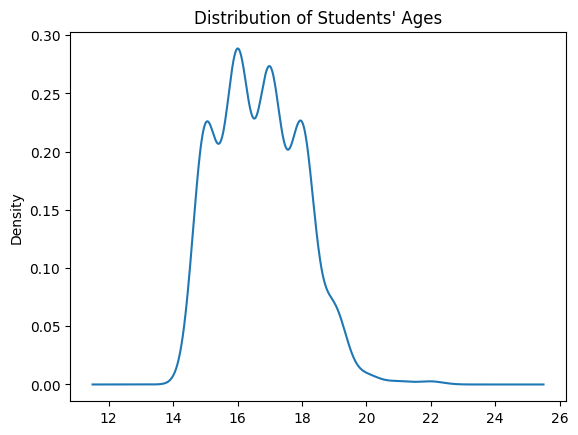

In [ ]:
student_df['age'].plot(kind='kde',title='Distribution of Students\' Ages')

<Axes: title={'center': "Distribution of Students's Absences"}, ylabel='Density'>

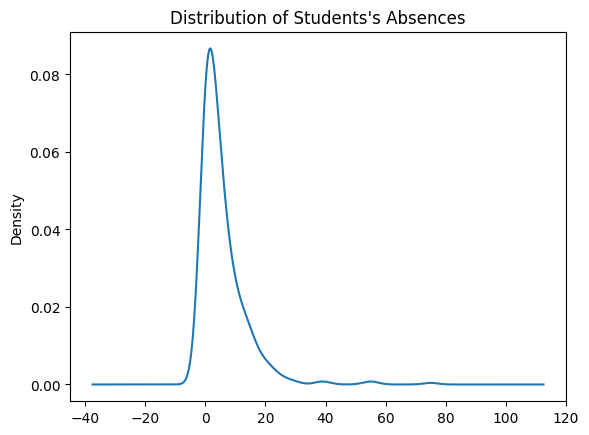

In [43]:
student_df['absences'].plot(kind='kde',title='Distribution of Students\'s Absences')

<Axes: title={'center': "Distribution of Students's Number of Previously Failed Classes"}, ylabel='Density'>

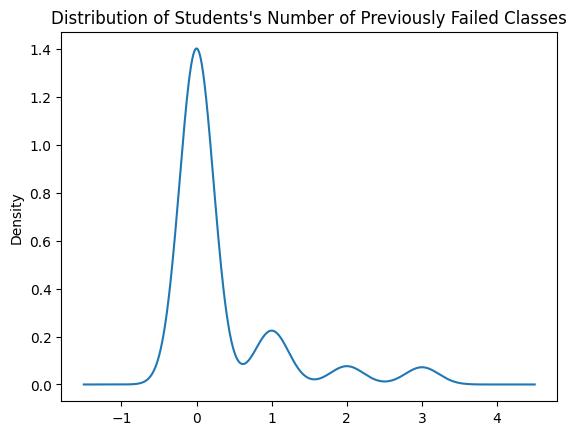

In [ ]:
student_df['class_failures'].plot(kind='kde',title='Distribution of Students\'s Number of Previously Failed Classes')

## 3. Conduct a PCA and find the first 2 leading principal components, make a comparison to see if the results match your hypothesis
---
 Note: Because PCA does not work for non-continuous data (e.g. categorical data, binary data, etc.), we will augment the dataset.
 We could try to employ a workaround such as one-hot-encoding, but I suspect this would not be useful.

 We will also remove the intermediate grades (variable 'grade_1' and 'grade_2') and only focus on the student's final grade

 Since PCA is a variance maximizing exercise, we will normalize our data before performing PCA. From my research this seems to be standard practice.

In [ ]:
# Remove Categorical Data
numeric_df = student_df.select_dtypes(['number'])
# Remove grade_1 & grade_2
numeric_df = numeric_df.drop(columns=['grade_1','grade_2'])
# Remove student_id -- not relevant
numeric_df = numeric_df.drop(columns=['student_id'])

# Define Examples
X = numeric_df.iloc[:,:-1]
# Define Labels (grades)
y = numeric_df['final_grade']

In [ ]:
# Scale the data
X = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2) # Not sure about the syntax here, doing this to access pca.components_
fit = pca.fit_transform(X)

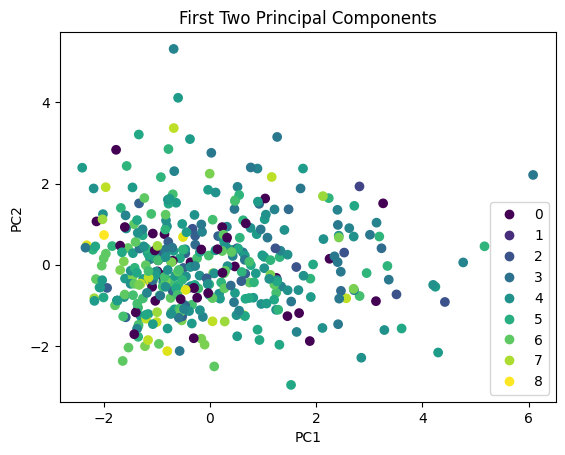

In [ ]:
# Show to first two principal components
plot = plt.scatter(fit[:,0], fit[:,1], c=y)

# This next line doesn't make sense. What are the labels here? Return later
# https://machinelearningmastery.com/principal-component-analysis-for-visualization/
plt.legend(handles=plot.legend_elements()[0],labels=range(20)) # I assume the labels are the possible final grades
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First Two Principal Components")
plt.show()

To determine which features (variables) have the greatest influence on each of our Principal Components, we will evaluate our PCA components.

The columns here correspond to the principal components (PC1 & PC2). The `j`th entry of the `i`th column gives us the score of the `j`th feature with respect to the `i`th principal component.

The higher a feature's score's absolute value, the greater its influence on the respective principal component.


In [ ]:
# To get an idea of how the columns are indexed let's take another peak at our numeric_df
numeric_df.columns

Index(['age', 'class_failures', 'family_relationship', 'free_time', 'social',
       'weekday_alcohol', 'weekend_alcohol', 'health', 'absences',
       'final_grade'],
      dtype='object')

In [ ]:
# Our scores are stored in pca.components_
scores = pca.components_

# We will leverage some fancy list comprehension techniques borrowed from stack overflow (https://stackoverflow.com/a/50257693)
# To view the results in a more readable manner
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in scores]))

0.23192319193329783	0.2542807076407705	-0.02565837526785679	0.2812519004661177	0.4343352844498835	0.5234982441114487	0.5527790325406909	0.08697189184667313	0.1611386090732062
0.3375230970639213	0.18000698443725133	-0.4814664572188237	-0.5021600530770328	-0.19365672624267105	0.029369752287524323	0.05154977102420148	-0.33874523097520537	0.4625254109770184


### Scores (Absolute Value Applied)

| Feature     | PC1 Score | PC2 Score|
|-------------|-----------|----------|
|age          | 0.23192319193329783|0.3375230970639213|
|class_failures|0.2542807076407705|0.18000698443725133|
|family_relationship| 0.02565837526785679|0.4814664572188237|
|free_time    | 0.2812519004661177|0.5021600530770328|
|social       | 0.4343352844498835|0.19365672624267105|
|weekday_alcohol| 0.5234982441114487|0.029369752287524323|
|weekend_alcohol| 0.5527790325406909|0.05154977102420148|
|health       | 0.08697189184667313|0.33874523097520537|
|absences     | 0.1611386090732062|0.4625254109770184|


### From the table above we can easily see that our highest scoring features are:
**PC 1**
1. `weekend_alcohol`
2. `weekday_alcohol`
3. `social`
**PC 2**
1. `free time`
2. `family_relationship`
3. `absences`

---

### On the whole, the highest scoring features are:
1. `weekend_alcohol`
2. `weekday_alcohol`
3. `free_time`

### These results do not match my hypothesis, but in hindsight they are sensible factors in a student's academic performance.

## 4. Use the first 2 leading principal components to find two heavily weighted features then perform a least squares regression
---
The most heavily weighted features according to our PCA results are `weekend_alcohol` and `weekday_alcohol`. Two input, one output regression typically calls for Multiple Linear Regression.


**It is important to note that one of the fundamental assumptions of Multiple Linear Regression is independence between our inputs. It is a well known result from statistics that Independence implies zero correlation. Our inputs here are pretty obviously correlated, so we will instead perform two separate least squares regressions.**


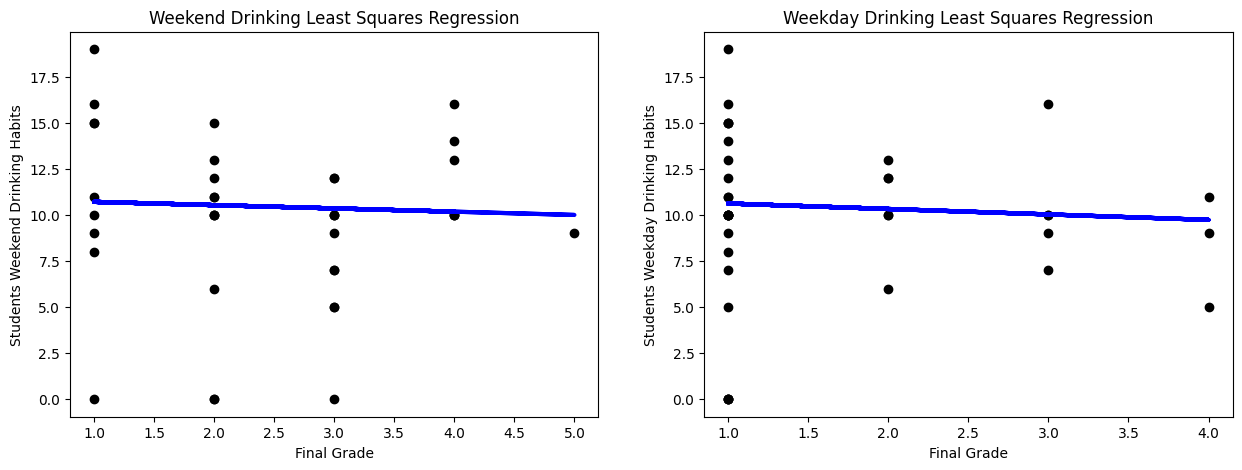

In [ ]:
from sklearn import linear_model

# Creating subplots
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1 = ax[0]
ax2 = ax[1]

# Create weekend_alcohol regression object
reg_1 = linear_model.LinearRegression()
# Approx 90/10 train/test split (dataset size = 382)
# We assume the data has been randomly sampled, and avoid shuffling
x_1 = np.array(numeric_df['weekend_alcohol']).reshape(-1,1)
x_1_train = x_1[:-38]
x_1_test = x_1[-38:]

y = np.array(numeric_df['final_grade']).reshape(-1,1)
y_train = y[:-38]
y_test = y[-38:]

# Train the weekend_alcohol regression
reg_1.fit(x_1_train, y_train)

# Make predictions using the test set
reg_1_y_pred = reg_1.predict(x_1_test)

ax1.scatter(x_1_test, y_test, color="black")
ax1.plot(x_1_test, reg_1_y_pred, color="blue", linewidth=3)
ax1.set_xlabel("Final Grade")
ax1.set_ylabel("Students Weekend Drinking Habits")
ax1.set_title("Weekend Drinking Least Squares Regression")


# Create weekday_alcohol regression object
reg_2 = linear_model.LinearRegression()
# Approx 90/10 train/test split (dataset size = 382)
# We assume the data has been randomly sampled, and avoid shuffling
x_2 = np.array(numeric_df['weekday_alcohol']).reshape(-1,1)
x_2_train = x_2[:-38]
x_2_test = x_2[-38:]

# Train the weekend_alcohol regression
reg_2.fit(x_2_train, y_train)

# Make predictions using the test set
reg_2_y_pred = reg_2.predict(x_2_test)

ax2.scatter(x_2_test, y_test, color="black")
ax2.plot(x_2_test, reg_2_y_pred, color="blue", linewidth=3)
ax2.set_xlabel("Final Grade")
ax2.set_ylabel("Students Weekday Drinking Habits")
ax2.set_title("Weekday Drinking Least Squares Regression")
plt.show()

## 5. Analyze the regression and write a conclusion
---

In [ ]:
# Weekend Drinking Regression Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=reg_1_y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=reg_1_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=reg_1_y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

# coefficient of determination (AKA R-squared)
print("CoD:",reg_1.score(x_1_test,y_test))

MAE: 3.2193787873857502
MSE: 20.617469110215694
RMSE: 20.617469110215694
CoD: -0.023642738108632377


In [ ]:
# Weekday regression metrics
mae = mean_absolute_error(y_true=y_test,y_pred=reg_2_y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=reg_2_y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=reg_2_y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

# coefficient of determination (AKA R-squared)
print("CoD:",reg_2.score(x_2_test,y_test))

MAE: 3.21915094673737
MSE: 20.683220089320233
RMSE: 20.683220089320233
CoD: -0.02690722765020004


### Regression Analysis

Firstly, we should address the elephants in the room: the results are similar between the two variables as they are highly correlated, and also due to the nature of the data, the regression performs poorly.

* Because there is small variability between the two features, most high level conclusions about the `weekend_drinking` regression will also apply to `weekday_drinking`. This allows us to kill two birds with one stone in our conclusion.
* The range of values for each of our features (`weekend_drinking` and  `weekday_drinking`) is quite small -- namely their ranges cover integers from one to five inclusive. Whereas the range of grades covers the integers between one and twenty inclusive. Performing regression on a one-to-many relation such as this one is a troublesome task.

We observe a negative slope (one would be wise to intuit that increased drinking habits leads to impaired academic performance). However, due to the one-to-many relationship we have, all of our error metrics are very high. This also leads to an abysmal R-squared value of approximately -0.03. R-squared values of less than 0.25 indicate little to no variation is explained by the feature.

This seems to contradict our PCA results. However I believe the lack of granularity of the relations domain (student drinking scores) explains this disconnect. In the dataset's current state, a student's drinking habits does not provide very interpretable insights into how the student may perform. But this does not disprove the suspected inverse correlation between drinking frequency and academic performance.